**<h2>QUESTION/ BUSINESS PROBLEM:</h2>**


*<h4>How can we efficiently predict healthcare insurance charges/claims to enhance fraud detection, improve financial planning, and optimize resource allocation ?</h4>*

**<h3>TRANSLATING THE BUSINESS PROBLEM INTO A DATA SCIENCE PROBLEM:</h3>** 


*<h4>Build a linear regression model to predict the total claim amount of health insurance.</h4>*

***Our Dataset***

The dataset used is synthetic and derived from US census data as outlined in “Machine Learning with R” by Brett Lantz	. For the purposes of this project, it is assumed that the insurance claims (target) are one-time events rather than recurring over a period.

**0.Data Dictionary**

**Age:** Age of primary beneficiary.  
**sex :** Insurance contractor gender, female / male.  
**bmi :** Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.  

**children:** Number of children covered by health insurance / Number of dependents.  
**smoker:** Smoker / Non - smoker.  
**region:** The beneficiary's residential area in the US, northeast, southeast, southwest, northwest.  
**charges:** Individual medical costs billed by health insurance.  


**<h3>1.DATA PRE PROCESSING AND WRANGLING </h3>**

**1.1. Importing all required modules**

In [403]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

**1.2. Load Dataset**

In [404]:
filepath = "/Users/tresornoel/Downloads/insurance.csv"
df = pd.read_csv(filepath)

**1.3. Checking the dataframe shape and the columns**

In [405]:
#Randomly selecting 10 rows in the dataset
print(df.sample(10))
#the dataset shape
print(f'\n')
print(df.shape)


      age     sex    bmi  children smoker     region     charges
869    25  female  24.30         3     no  southwest   4391.6520
1149   42    male  34.10         0     no  southwest   5979.7310
1200   37    male  24.32         2     no  northwest   6198.7518
744    50    male  26.41         0     no  northwest   8827.2099
361    35    male  30.50         1     no  southwest   4751.0700
1295   20    male  22.00         1     no  southwest   1964.7800
1059   32    male  33.82         1     no  northwest   4462.7218
785    35  female  27.70         3     no  southwest   6414.1780
1297   28  female  26.51         2     no  southeast   4340.4409
1085   39  female  18.30         5    yes  southwest  19023.2600


(1338, 7)


**1.4.Data cleaning and manipulation**

In [406]:
# Having an information overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [407]:
# removing all duplicates in the dataset
df.drop_duplicates(inplace = True)

**1.4. Handling missing values and checking our data types**

In [408]:
#checking missing values and sum it up
print(f'\n')
print(df.isnull().sum())

#checking the data types
print(f'\n')
print(df.dtypes)



age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


There are no missing values in the dataset and we have three types of datas: integers, floats and objects.

**1.5.Checking the statistical summary of the dataset**

In [409]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


**1.6.Encode categorical variables**

Encoding categorical variables(gender, smoker and region) will convert the categorical
variables into numerical format this will be useful when building the model
for model compatibility and improve model performance.

In [410]:
# #When you use pd.get_dummies, it creates new columns (one for each category) and assigns 
# binary values (0 or 1) to indicate the presence of each category.
# By setting drop_first=True, one of the categories is dropped from the dummy variables. 
# This prevents multicollinearity by ensuring that the dummy variables are linearly independent.

df_encoded = pd.get_dummies(df, columns=['sex', 'region', 'smoker'], drop_first=True)
df_encoded = df_encoded.astype(int)     #converting it into numerical because it was booleans values
print(df_encoded)

      age  bmi  children  charges  sex_male  region_northwest  \
0      19   27         0    16884         0                 0   
1      18   33         1     1725         1                 0   
2      28   33         3     4449         1                 0   
3      33   22         0    21984         1                 1   
4      32   28         0     3866         1                 1   
...   ...  ...       ...      ...       ...               ...   
1333   50   30         3    10600         1                 1   
1334   18   31         0     2205         0                 0   
1335   18   36         0     1629         0                 0   
1336   21   25         0     2007         0                 0   
1337   61   29         0    29141         0                 1   

      region_southeast  region_southwest  smoker_yes  
0                    0                 1           1  
1                    1                 0           0  
2                    1                 0           0  

In [411]:
#Checking the encoded dataframe
df_encoded.head()

,age,bmi,children,charges,sex_male,region_northwest,region_southeast,region_southwest,smoker_yes
0,19,27,0,16884,0,0,0,1,1
1,18,33,1,1725,1,0,1,0,0
2,28,33,3,4449,1,0,1,0,0
3,33,22,0,21984,1,1,0,0,0
4,32,28,0,3866,1,1,0,0,0


**<h3>2.FEATURE ENGINEERING</h3>**

**2.1. Grouping and aggregating categorical data**

 Aggregating by region, sex, or smoker status can each provide valuable insights.  on the code below each categorical feature will be grouped ,renamed and merged.<br> To have an insight of mean charges distribution per categorical data.

**2.1.1. Grouping and aggregating the 'region' feature**

In [412]:
#Group by region and calculate the mean charges per region
region_agg = df.groupby('region').agg({'charges':'mean'}).reset_index()

# Rename the columns for clarity
region_agg.columns = ['region', 'mean_charges_by_region']

#Merge the aggregated features back to the original dataframe
df = df.merge(region_agg, on='region', how='left')

**2.1.2. Grouping and aggregating the 'sex' feature**

In [413]:
#Group by sex and calculate the mean charges per sex
sex_agg = df.groupby('sex').agg({'charges':'mean'}).reset_index()

# Rename the columns for clarity
sex_agg.columns = ['sex', 'mean_charges_by_sex']

#Merge the aggregated features back to the original dataframe
df = df.merge(sex_agg, on='sex', how='left')

**2.1.3. Grouping and aggregating the 'smoker' feature**

In [414]:
#Group by smoker or not and calculate the mean charges per region
smoker_agg = df.groupby('smoker').agg({'charges':'mean'}).reset_index()

# Rename the columns for clarity
smoker_agg.columns = ['smoker', 'mean_charges_by_smoker']

#Merge the aggregated features back to the original dataframe
df = df.merge(smoker_agg, on='smoker', how='left')

After grouping & aggregating, renaming and merging the new columns , let's print the new dataframe to see how it looks like.

**2.2. Printing the dataframe**

In [415]:
#Printing the dataframe
print(df)

      age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1332   50    male  30.970         3     no  northwest  10600.54830   
1333   18  female  31.920         0     no  northeast   2205.98080   
1334   18  female  36.850         0     no  southeast   1629.83350   
1335   21  female  25.800         0     no  southwest   2007.94500   
1336   61  female  29.070         0    yes  northwest  29141.36030   

      mean_charges_by_region  mean_charges_by_sex  mean_charges_by_smoker  
0               12346.937377         12569.578844            32050.231832  
1      

In the Dataframe above, the charges per categorical features, we can see that the region and sex doesn't affect much the charges /claims.  
on other hand we may observe a huge difference in smokers and non-smokers charges.

**<h3>3.EXPLORATORY DATA ANALYSIS</h3>**

**3.1.Plotting Histograms**

We plot histograms to have an overview of our data distribution in the features.

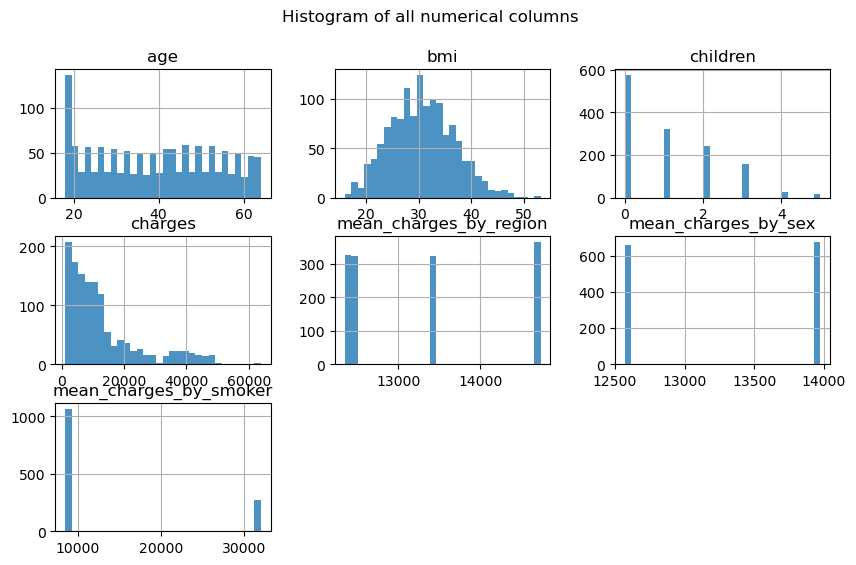

In [416]:
# Plotting histograms of our numeric features
df.hist(figsize = (10, 6), bins = 30, alpha = 0.8)
plt.suptitle('Histogram of all numerical columns')
plt.savefig('Histogram of all numerical columns', dpi=300)
plt.show()

After plotting histograms of the numerical columns we can see that the BMI  tends to be normally distributed,
the charges are skewed to the right, the age is uniformely distriburted across different age's categories and
the children is slightly skewed to the right.

**3.2.Plotting Boxplots**

By plotting the boxplots of the numerical columns we  can easily visualize the outliers medidin the dataframe

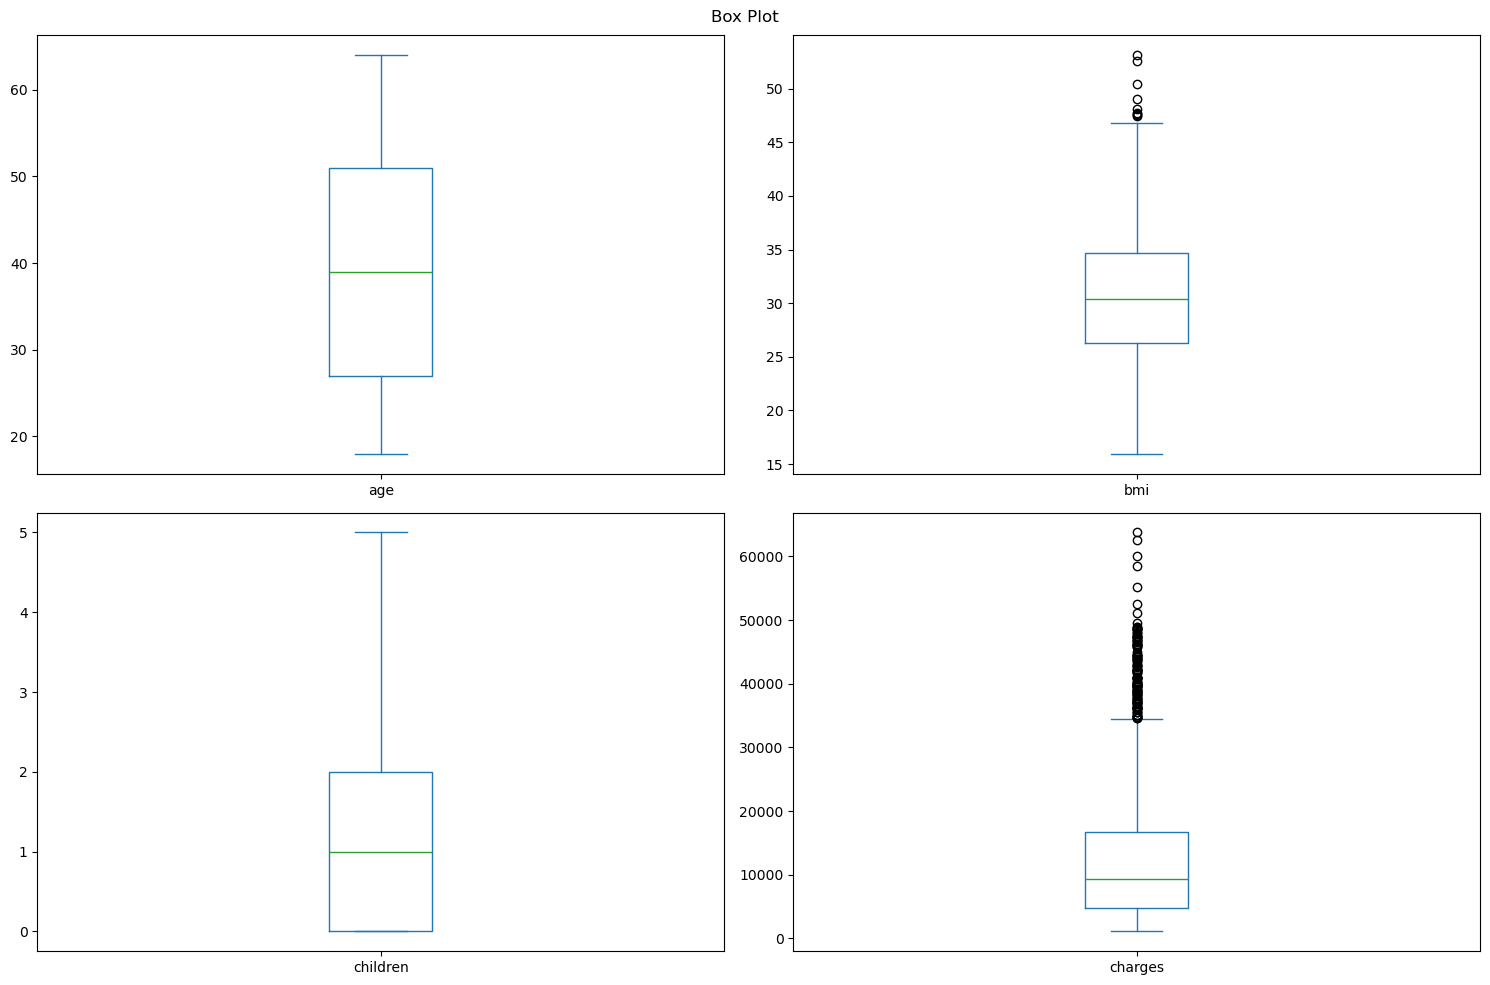

In [417]:
# Create box plots for each numerical column
numerical_columns = ['age', 'bmi','children', 'charges']
df[numerical_columns].plot(kind='box', subplots=True, layout=(2, 2), figsize=(15, 10), title='Box Plot')
plt.tight_layout()
plt.show()

**3.2.1. Handling outliers**

In [418]:
for col in ['bmi', 'charges']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\nOutliers in {col}:")
    print(outliers[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']])


Outliers in bmi:
      age     sex    bmi  children smoker     region      charges
116    58    male  49.06         0     no  southeast  11381.32540
286    46  female  48.07         2     no  northeast   9432.92530
401    47    male  47.52         1     no  southeast   8083.91980
543    54  female  47.41         0    yes  southeast  63770.42801
846    23    male  50.38         1     no  southeast   2438.05520
859    37  female  47.60         2    yes  southwest  46113.51100
1046   22    male  52.58         1    yes  southeast  44501.39820
1087   52    male  47.74         1     no  southeast   9748.91060
1316   18    male  53.13         0     no  southeast   1163.46270

Outliers in charges:
      age     sex     bmi  children smoker     region      charges
14     27    male  42.130         0    yes  southeast  39611.75770
19     30    male  35.300         0    yes  southwest  36837.46700
23     34  female  31.920         1    yes  northeast  37701.87680
29     31    male  36.300       

I decided to keep the outliers because they might be relevant to my dataframe for the following reasons :<br> **1.** For insurance charges, outliers (very high charges) might be particularly important. They could represent the high-risk cases that insurance companies are most concerned about. Removing them might lead to an underestimation of risk.<br> **2.** 
For BMI, extreme values might indicate health conditions that significantly impact insurance charges. Unless you have reason to believe these are errors, so i decided to keep them.

**3.3.Plotting pairplots**

Pair plots allow you to visualize the relationships between multiple features.  From the pairplots below he points are colored based on whether the person is a smoker or not, making it easier to visualize relationships and differences across this category. 

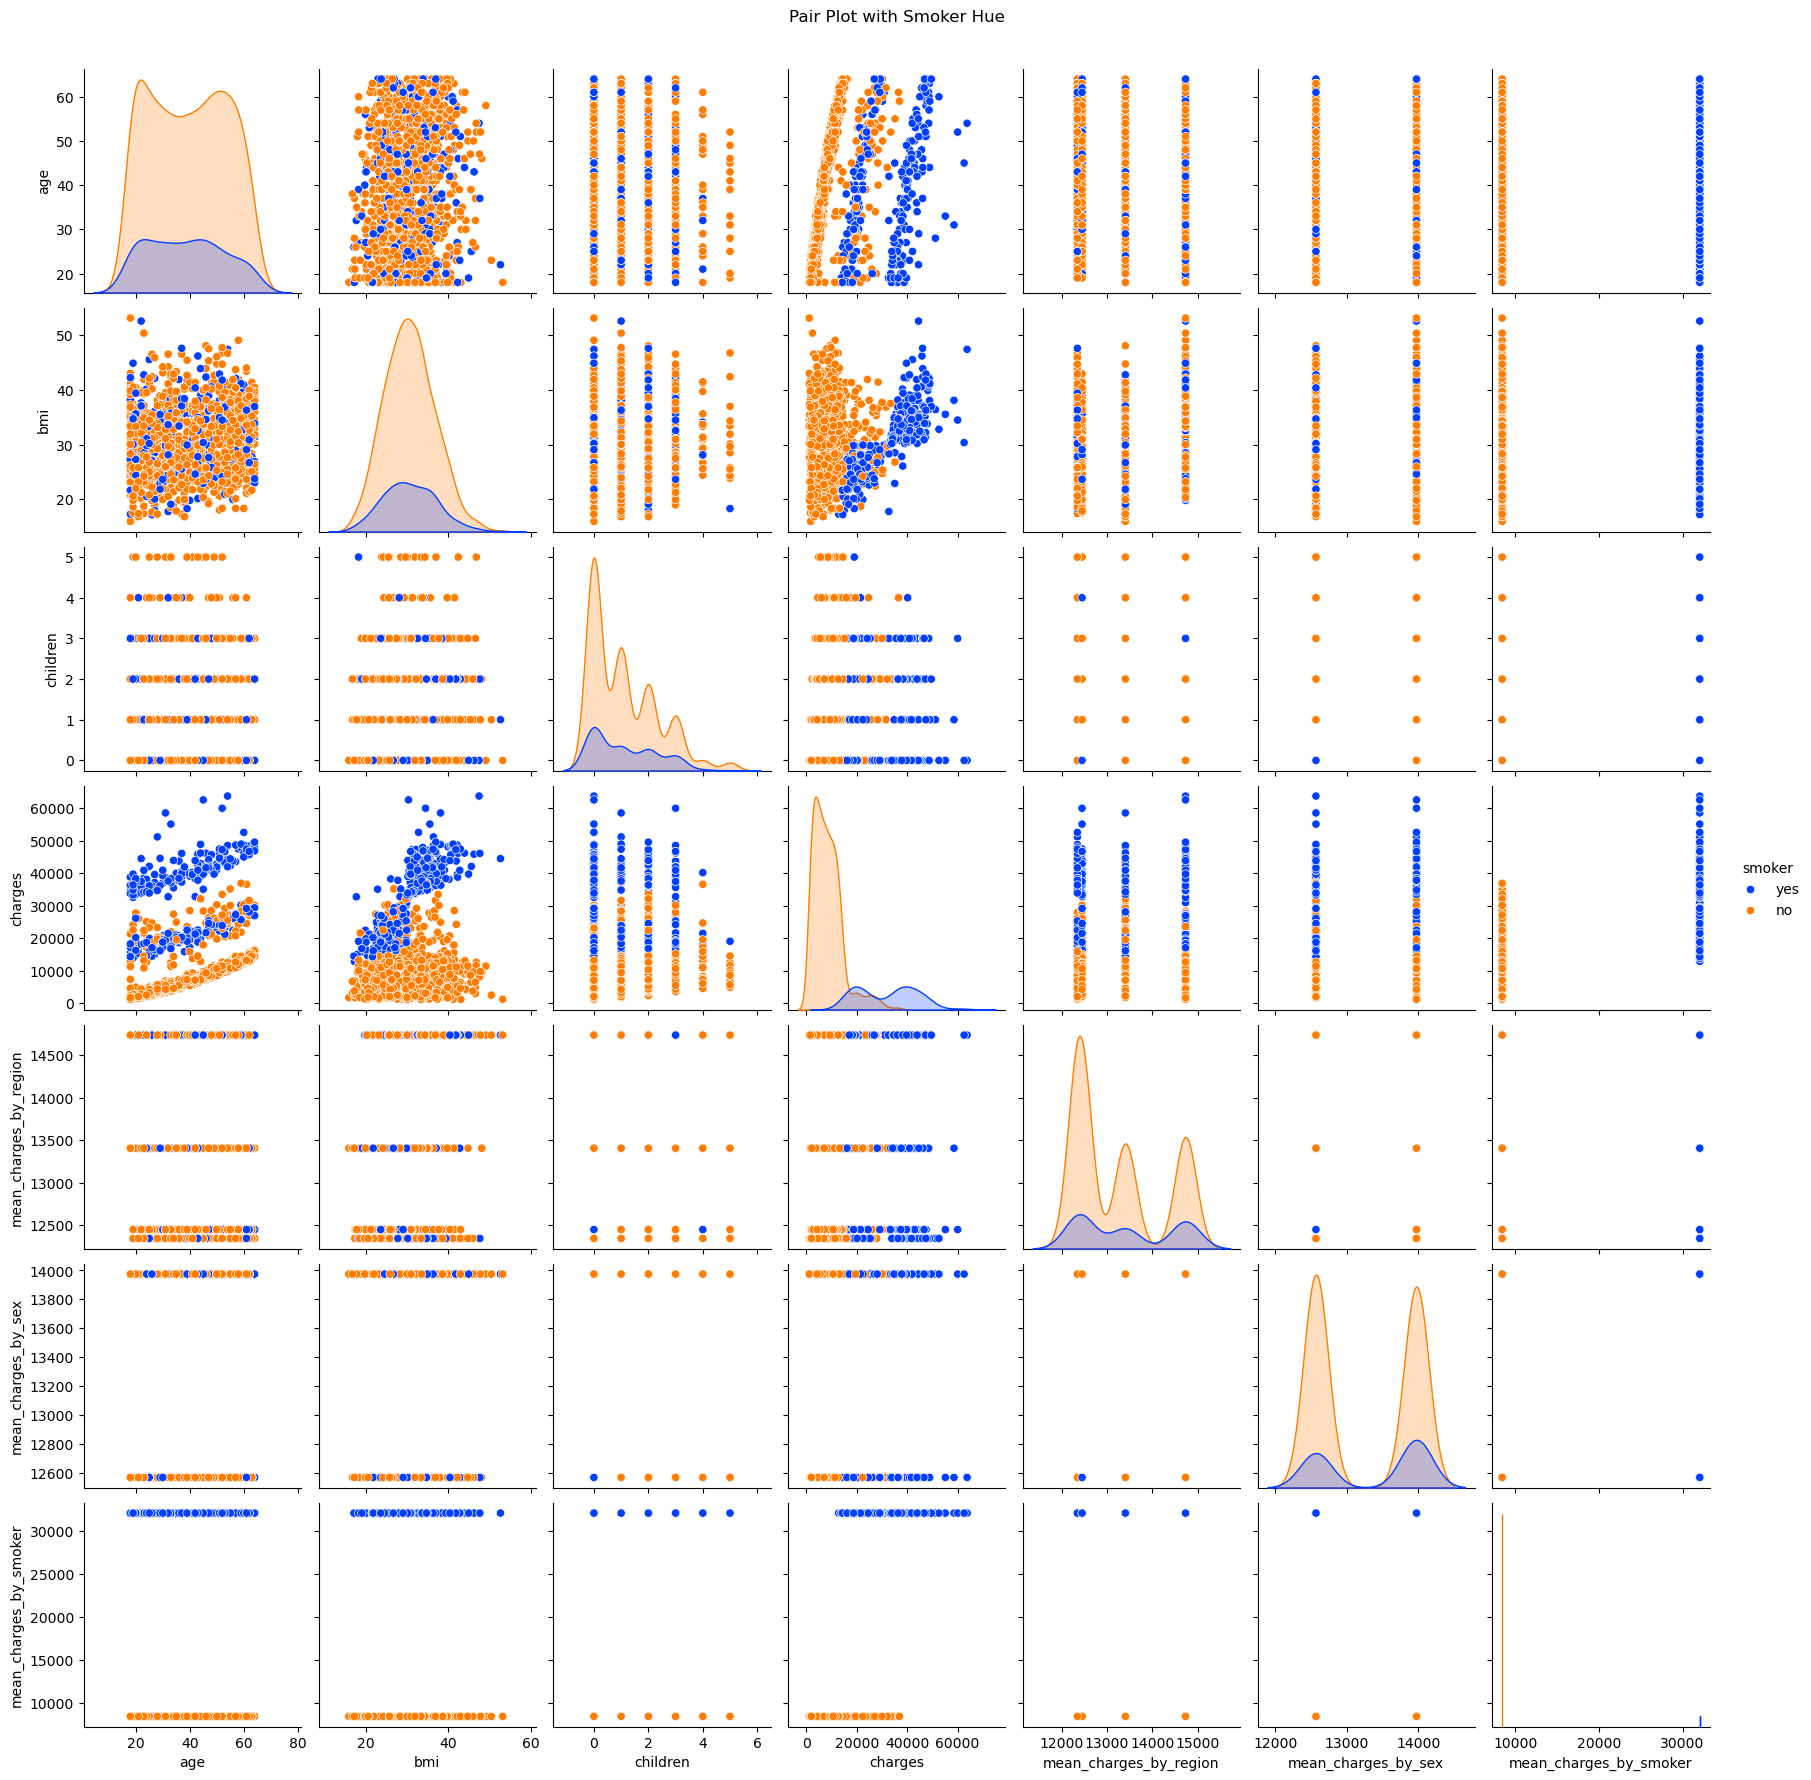

In [419]:
#plotting pairplots
sns.pairplot(df, hue='smoker', palette='bright')
plt.suptitle('Pair Plot with Smoker Hue', y=1.02)
plt.show()

**3.4.Plotting barplots for categorical columns**

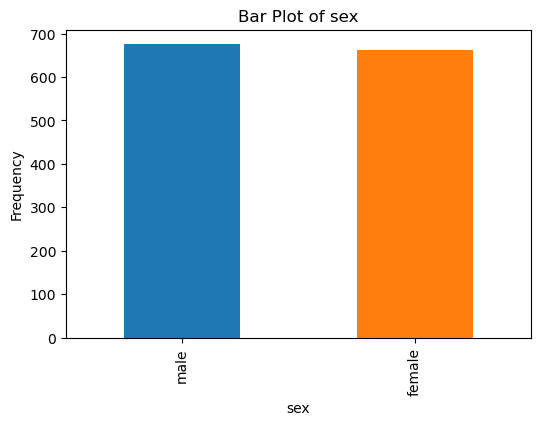

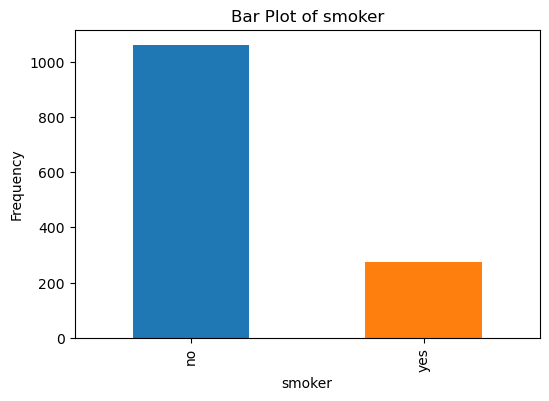

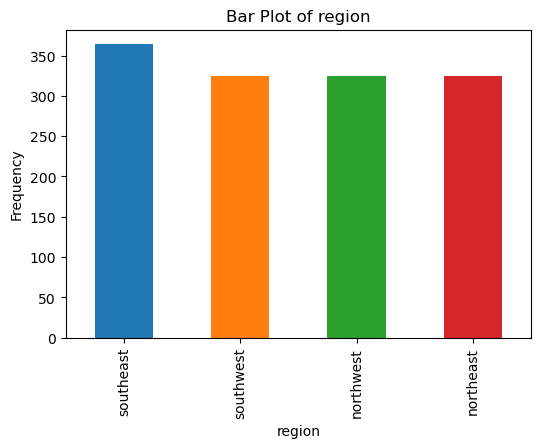

In [420]:
# Plot bar plots for categorical columns
categorical_columns = df.select_dtypes(include = ['object','category']).columns

for column in categorical_columns:
    plt.figure(figsize=(6, 4))
    value_counts = df[column].value_counts()
    colors = plt.cm.tab10(range(len(value_counts)))  # Get a list of colors
    value_counts.plot(kind='bar', color=colors)
    plt.title(f'Bar Plot of {column}')    
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

**3.5.correlation between numerical columns**

In [421]:
#Checking the correlation between numerical columns
corr_df = df[['age', 'bmi', 'charges', 'children']].corr()
print(corr_df)

               age       bmi   charges  children
age       1.000000  0.109344  0.298308  0.041536
bmi       0.109344  1.000000  0.198401  0.012755
charges   0.298308  0.198401  1.000000  0.067389
children  0.041536  0.012755  0.067389  1.000000


**3.5.1.Heatmap of the correlation between numerical columns**

Heatmap gives a clear view of the correlation

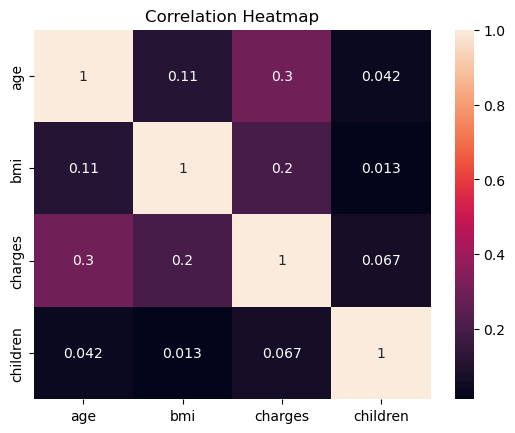

In [422]:
# Correlation heatmap of numerical features 
sns.heatmap(corr_df, annot=True)
plt.title('Correlation Heatmap')
plt.savefig('Correlation Heatmap', dpi=300)
plt.show()

From the correlation between numerical values we can see that most of the features are correlated to each other but the age is highly correlated to the charges , the bmi and number of children are also correlated to the charges but not as high as the age.

**3.6.correlation of the encoded dataframe**

In [423]:
# Checking the correlation of the encoded dataframe as well.
corr_encoded = df_encoded.corr()
print(corr_encoded)

                       age       bmi  children   charges  sex_male  \
age               1.000000  0.108491  0.041536  0.298309 -0.019814   
bmi               0.108491  1.000000  0.011081  0.196236  0.046541   
children          0.041536  0.011081  1.000000  0.067390  0.017848   
charges           0.298309  0.196236  0.067390  1.000000  0.058046   
sex_male         -0.019814  0.046541  0.017848  0.058046  1.000000   
region_northwest  0.001495 -0.138620  0.026044 -0.038695 -0.012482   
region_southeast -0.012311  0.271328 -0.023492  0.073577  0.017578   
region_southwest  0.009415 -0.004325  0.021538 -0.043637 -0.003767   
smoker_yes       -0.025587  0.001659  0.007331  0.787234  0.076596   

                  region_northwest  region_southeast  region_southwest  \
age                       0.001495         -0.012311          0.009415   
bmi                      -0.138620          0.271328         -0.004325   
children                  0.026044         -0.023492          0.021538   
cha

**3.6.1.Heatmap correlation of the encoded dataframe**

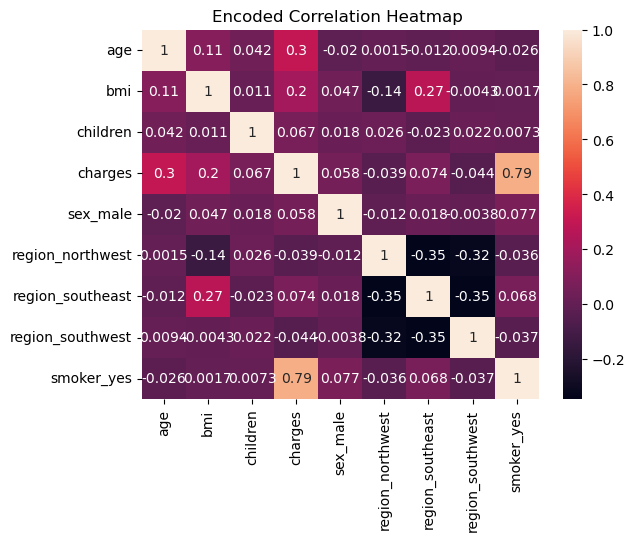

In [424]:
#Plotting heatmap to visualize the correlation in the encoded dataframe
sns.heatmap(corr_encoded, annot=True)
plt.title('Encoded Correlation Heatmap ')
plt.savefig('Encoded Correlation Heatmap', dpi=300)
plt.show()

From the encoded dataframe we get more insights, the amount of charges are strongly correlated to  either the insured is a smoker or not, and we can see that the population in the southeast region is correlated to bmi compared to other regions.

**<h3>4.MODEL BUILDING</h3>**

**4.1. Split the data**

In [425]:
# Separate features and target variable
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

#Splitting the data into trainig set and testing set
X_train,X_test,y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

**4.2. Feature selection using Lasso Regression**

To prevent overfitting in my model i choose to use the lasso regression for features selection.Lasso regression uses the regularisation parameter and  By penalizing the absolute values of the coefficients, Lasso can force some coefficients to be exactly zero. This means those features are effectively removed from the model, hence performing feature selection.

In [426]:
from sklearn.linear_model import LassoCV

# Use LassoCV for feature selection
lasso = LassoCV(cv=5)
lasso.fit(X_train, y_train)

# Get the coefficients
#Create a pandas Series with the coefficients and feature names
coefficients = pd.Series(lasso.coef_, index=X_train.columns)

# Select non-zero coefficients
selected_features = coefficients[coefficients != 0].index  
print(f"Selected Features by Lasso: {selected_features}")

Selected Features by Lasso: Index(['age', 'bmi', 'children', 'region_southeast', 'region_southwest',
       'smoker_yes'],
      dtype='object')


By selecting non zero coefficients, Features with non-zero coefficients are considered important by the Lasso model.

Now that we selected the features, let's use them for the model building

**4.3.Prepare the data with selected Features**

In [427]:
# use selected features from lasso for training and testing
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

**4.4.Train the linear regression model**

In [428]:
#Initialize the model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train_selected, y_train)

LinearRegression()

The training data is the selected features(training set)and target(training set)

**4.5.Make predictions**

In [429]:
#Predict on the test set
y_pred = model.predict(X_test_selected)

The predictions are performed on the selected features as well(Test set)

**4.6.Evaluate the model**

We evaluate a regression model,to assess how well the model predicts the target variable. The metrics chosen should provide insight into the model’s performance and it's accuracy 

**1.** In this particular case i used Root Mean Squared Error RMSE because we are dealing with monetary values like insurance charges. and for its interpretability in the same unit as the target variable, making it easier to communicate the model’s performance.<br>                                                                                   **2.** R² (R-squared) provides a measure of how well the independent variables explain the variability of the target variable and its easy to interpret as a percentage of explained variance.

            feature    importance
5        smoker_yes  23089.977780
3  region_southeast    648.746344
2          children    532.488851
4  region_southwest    474.826933
1               bmi    316.642097
0               age    248.616823


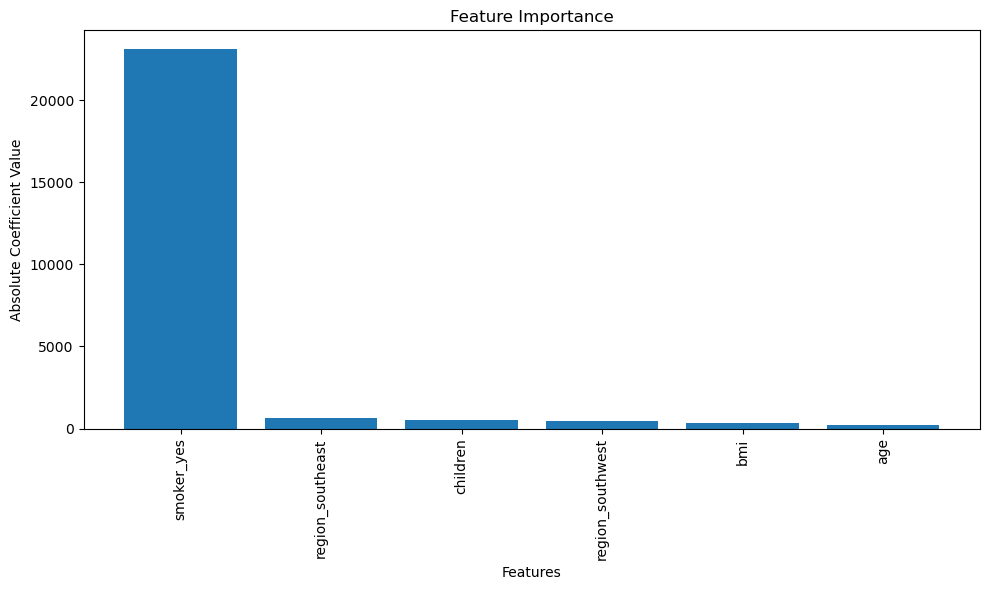

In [430]:
import pandas as pd

feature_names = ['age', 'bmi', 'children', 'region_southeast', 'region_southwest',
       'smoker_yes'] 

# Getting the coefficients of my model
coefficients = model.coef_

# Creating a dataframe of feature importances
feature_importance = pd.DataFrame({'feature': feature_names, 'importance': abs(coefficients)})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print(feature_importance)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Absolute Coefficient Value')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


In [431]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate R^2 Score
r2 = r2_score(y_test, y_pred)

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

print(f'R^2 Score: {r2}')

Root Mean Squared Error (RMSE): 5957.164794159273
R^2 Score: 0.8068754438043038


**4.7.Visualize the results**

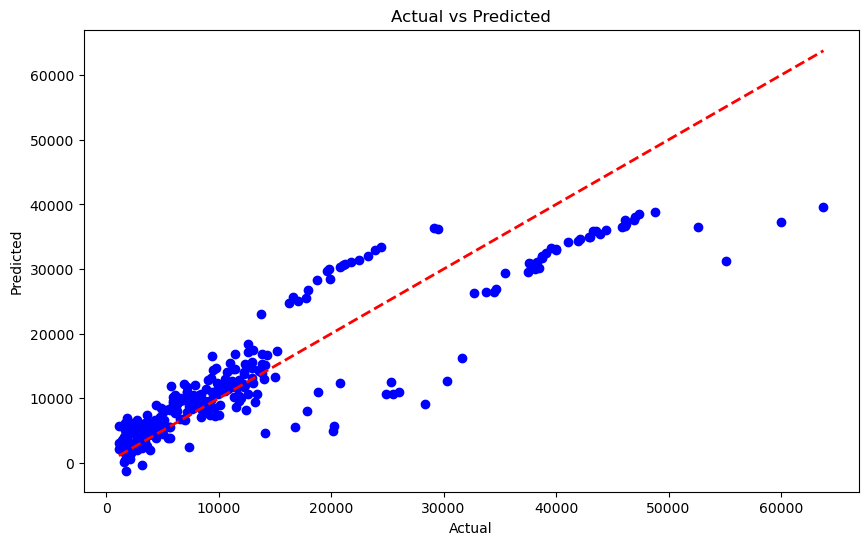

In [432]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
# Plots a reference line (diagonal) to compare actual and predicted values.
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

This plot helps to visualize how well the model’s predictions match the actual values. Ideally, the points should align closely with the 45-degree reference line, indicating that predicted values are similar to actual values.<br> Points close to the line indicate accurate predictions.<br>
Points far from the line indicate larger prediction errors.

**4.8.Residual Plot**

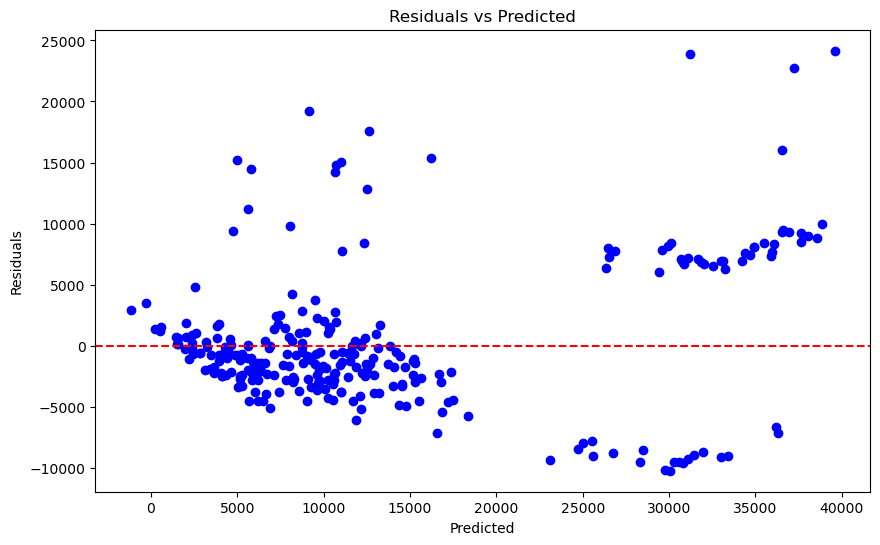

In [433]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()

By plotting the residuals against the predicted values, you can identify patterns (e.g.a curve or any systematic pattern)that might suggest issues with the model, such as non-linearity.<br>Ideally, residuals should be randomly distributed around the horizontal line (y=0), indicating no patterns

**<h3>5.CONCLUSION</h3>**

R² of 0.8068 suggests that my model explains about 80.68% of the variability in the target variable, which is good.<br>  The RMSE of  5,957 means my prediction is off 5,957USD. it's quite high in the context of my data because the average insurance charge is $13279.12  i tried different features enginnering and different other methods unfortunately this one was the best i had, i believe there are some other models (maybe not covered yet) that can perform better.<br>
THANK YOU!!!!